# **Cuestión 4**
 **Elaboración de un estudio acerca de los distintos diluyentes sobre la calidad seminal y formas anormales**

**Descripción del tutor de la empresa:**

> *tenemos varios cambios de diluyente en fechas recientes. El diluyente es 
el líquido que se le añade a los espermatozoides para que sobreviva. Es un componente clave y estratégico en los 
centros de inseminación. Hay de muchos tipos, y nosotros estamos empleando 3 distintos. Estos diluyentes pueden 
tener un cierto impacto en la motilidad y calidad de movimiento, tanto de los eyaculados como de la conservación, 
así como en las contaminaciones (las que tienen que ver con las dosis, el diluyente y los eyaculados, NO las que 
tienen que ver con agua y superficies) y algunas formas anormales (totales, acrosomas, cabezas anormales, colas 
anormales). No deberían influir en ningún otro parámetro. Las fechas en las que hemos usado los diluyentes son las 
siguientes:
>
> *-DILUYENTE 1: del 3/11/2020 al 4/12/2020 (incluidos) y Del 17/01/2021 al 12/02/2021 (incluidos).*
>
> *-DILUYENTE 2: del 31/05/2020 al 07/07/2020 (incluidos) y Del 21/03/2021 a la actualidad (incluidos).*
>
> *-DILUYENTE 3: todo el resto de fechas.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')

In [3]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [4]:
df[df['MOTIVO_DESECHO'] == 'B'].head(20)

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
77,141383,2020-01-13,2548,920ND41,PEÑAS,68,58,609,70,7,6,16,0,0.0,0.0,598,0,False,B,OK,False,NaN,0.0,False,31483.0,0.0,0.0,0.0,DANBRED,0,NaN,NaN
524,141635,2020-01-15,2459,807PU90,CAL,68,56,525,85,7,6,16,0,0.0,0.0,718,0,False,B,OK,False,NaN,0.0,False,31445.0,0.0,0.0,0.0,PIETUPB,0,NaN,NaN
737,141231,2020-01-08,2524,907PB45,CAL,68,56,674,150,8,7,45,0,0.0,0.0,536,0,False,B,OK,False,NaN,0.0,False,24281.0,0.0,0.0,0.0,PAC,0,NaN,NaN
852,141753,2020-01-17,2459,807PU90,CAL,68,83,451,165,8,7,33,0,0.0,0.0,627,0,False,B,OK,False,NaN,0.0,False,31381.0,0.0,0.0,0.0,PIETUPB,0,NaN,NaN
899,141800,2020-01-20,2550,920ND43,PEÑAS,68,82,609,84,4,5,23,0,0.0,0.0,566,0,False,B,OK,False,NaN,0.0,False,31343.0,0.0,0.0,0.0,DANBRED,0,NaN,NaN
949,141851,2020-01-20,2542,920PA35,PEÑAS,68,82,599,119,5,5,32,0,0.0,0.0,660,0,False,B,OK,False,NaN,0.0,False,31343.0,0.0,0.0,0.0,PIETAXIOM,0,NaN,NaN
1294,142031,2020-01-22,2379,807PB31,CAL,68,56,403,73,8,0,13,0,0.0,0.0,481,0,False,B,OK,False,NaN,0.0,False,30667.0,0.0,0.0,0.0,PAC,0,NaN,NaN
2066,142642,2020-02-03,2562,920PA54,PEÑAS,68,58,593,115,2,5,30,0,0.0,0.0,563,0,False,B,OK,False,NaN,0.0,False,30976.0,0.0,0.0,0.0,PIETAXIOM,0,NaN,NaN
2691,143103,2020-02-10,2562,920PA54,PEÑAS,68,58,672,158,3,4,48,0,0.0,0.0,634,0,False,B,OK,False,NaN,0.0,False,31208.0,0.0,0.0,0.0,PIETAXIOM,0,NaN,NaN
2692,143104,2020-02-10,2548,920ND41,PEÑAS,68,58,454,143,3,4,29,0,0.0,0.0,634,0,False,B,OK,False,NaN,0.0,False,31208.0,0.0,0.0,0.0,DANBRED,0,NaN,NaN


In [5]:
df['FECHA_REC'].min()

Timestamp('2012-12-03 00:00:00')

In [6]:
df['FECHA_REC'].max()

Timestamp('2021-01-01 00:00:00')

In [7]:
df.shape

(153699, 32)

In [8]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

tomasconservacion = pd.read_excel('TOMAS_CONSERVACION.xlsx')

In [9]:
tomasconservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS


**Los tres diluyentes se diferencias por fechas de aplicación. Definidos los intervalos, hay que analizar qué fechas se encuentran en qué intervalos y añadir una columna con el tipo de diluyente**

In [10]:
df['TIPO_DILUYENTE'] = ''

In [11]:
d1_min1 = datetime(2020, 11, 3)
d1_max1 = datetime(2020, 12, 4)
d1_min2 = datetime(2021, 1, 17)
d1_max2 = datetime(2021, 2, 12)

d2_min1 = datetime(2020, 5, 31)
d2_max1 = datetime(2020, 7, 7)
d2_min2 = datetime(2021, 3, 21)
d2_max2 = datetime(2021, 5, 23)

# **INFLUENCIA EN EYACULADOS**

**Primero se estudiará la influencia de los diluyentes en la base de datos de EYACULADOS, la cual contiene información de las muestras nada más sacarlas del verraco.**

In [12]:
df_temp = df[(df['FECHA_REC'] > d1_min1) | (df['FECHA_REC'] < d1_max1)]
df_temp.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,TIPO_DILUYENTE
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6,
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4,
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5,
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6,
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6,


In [13]:
df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d1_min1) & (df['FECHA_REC'] <= d1_max1), 'DILUYENTE_1', df['TIPO_DILUYENTE'])
df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d1_min2) & (df['FECHA_REC'] <= d1_max2), 'DILUYENTE_1', df['TIPO_DILUYENTE'])

df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d2_min1) & (df['FECHA_REC'] <= d2_max1), 'DILUYENTE_2', df['TIPO_DILUYENTE'])
df['TIPO_DILUYENTE'] = np.where((df['FECHA_REC']>=d2_min2) & (df['FECHA_REC'] <= d2_max2), 'DILUYENTE_2', df['TIPO_DILUYENTE'])

df['TIPO_DILUYENTE'] = np.where(df['TIPO_DILUYENTE'] == '', 'DILUYENTE_3',df['TIPO_DILUYENTE'])

In [14]:
df['TIPO_DILUYENTE'].unique()

array(['DILUYENTE_3', 'DILUYENTE_2', 'DILUYENTE_1'], dtype=object)

In [15]:
df['TIPO_DILUYENTE'].value_counts()

DILUYENTE_3    149851
DILUYENTE_2      2230
DILUYENTE_1      1618
Name: TIPO_DILUYENTE, dtype: int64

### **ANALISIS MOTILIDAD**

In [16]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,TIPO_DILUYENTE
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6,DILUYENTE_3
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4,DILUYENTE_3
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5,DILUYENTE_3
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6,DILUYENTE_3
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6,DILUYENTE_3


In [17]:
tabla1 = df.groupby(['TIPO_DILUYENTE'])['MOTILIDAD', 'CALIDAD_MOVIMIENTO'].describe()
tabla1

MOTILIDAD                                               \
                   count      mean       std  min  25%  50%  75%  max   
TIPO_DILUYENTE                                                          
DILUYENTE_1       1618.0  8.822002  0.541840  0.0  9.0  9.0  9.0  9.0   
DILUYENTE_2       2230.0  8.775336  0.734475  0.0  9.0  9.0  9.0  9.0   
DILUYENTE_3     149851.0  8.371202  0.959093  0.0  8.0  8.0  9.0  9.0   

               CALIDAD_MOVIMIENTO                                               
                            count      mean       std  min  25%  50%  75%  max  
TIPO_DILUYENTE                                                                  
DILUYENTE_1                1618.0  7.419036  0.605016  0.0  7.0  7.0  8.0  8.0  
DILUYENTE_2                2230.0  7.349776  0.660755  0.0  7.0  7.0  8.0  9.0  
DILUYENTE_3              149851.0  7.415139  0.879058  0.0  7.0  8.0  8.0  9.0

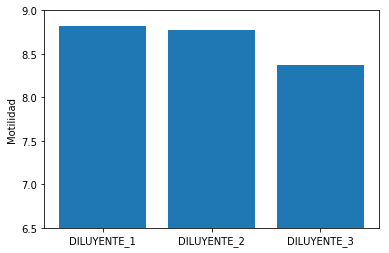

In [18]:
plt.bar(tabla1['MOTILIDAD']['mean'].index, tabla1['MOTILIDAD']['mean'].values);
plt.ylabel('Motilidad')
plt.ylim([6.5, 9]);

In [19]:
df_aux = tabla1['MOTILIDAD']['mean']
df_aux = pd.DataFrame(df_aux)
df_aux.reset_index()
df_aux['MOTILIDAD_BAJA'] = tabla1['MOTILIDAD']['mean'] - tabla1['MOTILIDAD']['std']
df_aux['MOTILIDAD_ALTA'] = tabla1['MOTILIDAD']['mean'] + tabla1['MOTILIDAD']['std']
df_aux

,mean,MOTILIDAD_BAJA,MOTILIDAD_ALTA
TIPO_DILUYENTE,,,
DILUYENTE_1,8.822002,8.280162,9.363843
DILUYENTE_2,8.775336,8.040861,9.509812
DILUYENTE_3,8.371202,7.412109,9.330295


In [20]:
df_aux.to_excel('EYACULADOS-MOTILIDAD.xlsx')

### **ANALISIS CALIDAD_MOVIMIENTO**

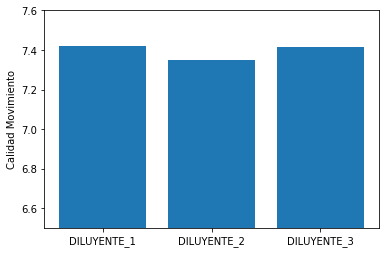

In [21]:
plt.bar(tabla1['CALIDAD_MOVIMIENTO']['mean'].index, tabla1['CALIDAD_MOVIMIENTO']['mean'].values);
plt.ylabel('Calidad Movimiento')
plt.ylim([6.5, 7.6]);

In [22]:
df_aux = tabla1['CALIDAD_MOVIMIENTO']['mean']
df_aux = pd.DataFrame(df_aux)
df_aux.reset_index()
df_aux['CM_BAJA'] = tabla1['CALIDAD_MOVIMIENTO']['mean'] - tabla1['CALIDAD_MOVIMIENTO']['std']
df_aux['CM_ALTA'] = tabla1['CALIDAD_MOVIMIENTO']['mean'] + tabla1['CALIDAD_MOVIMIENTO']['std']
df_aux

,mean,CM_BAJA,CM_ALTA
TIPO_DILUYENTE,,,
DILUYENTE_1,7.419036,6.814020,8.024052
DILUYENTE_2,7.349776,6.689021,8.010531
DILUYENTE_3,7.415139,6.536081,8.294197


In [23]:
df_aux.to_excel('EYACULADOS-CALIDAD_MOVIMIENTO.xlsx')

### **ANALISIS FROMAS ANORMALES**

In [24]:
df_DILUYENTE1 = df[df['TIPO_DILUYENTE'] == 'DILUYENTE_1']

In [25]:
values = df_DILUYENTE1['MOTIVO_DESECHO'].value_counts()
dict(values)
values.pop('OK')

1524

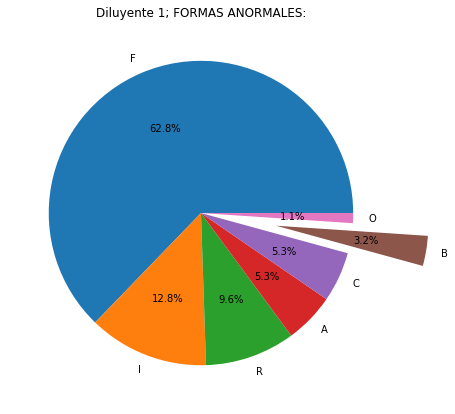

In [26]:
fig, ax = plt.subplots(1, 1)
fig1 = plt.figure(1)
my_explode = [0, 0, 0, 0, 0, 0.5, 0]
ax.pie(values, labels = values.index, explode = my_explode, autopct='%1.1f%%');
plt.title("Diluyente 1; FORMAS ANORMALES:");
fig1.set_size_inches(7, 7)

In [27]:
df_DILUYENTE1.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,TIPO_DILUYENTE
15954,158903,2020-11-04,2737,007DP56,CAL,68,56,329,97,9,7,14,14,0.0,833.0,329,2280,True,OK,OK,True,N07DPA14503,0.0000,True,28856.0,0.0,3391.0,833.0,DUPIC,14,20.600000,7.8,DILUYENTE_1
15955,158904,2020-11-04,2285,707DP38,CAL,68,56,533,142,9,7,34,34,0.0,2289.0,533,2226,True,OK,OK,True,N07DPA14504,143.0000,True,28856.0,0.0,3392.0,2289.0,DUPIC,34,21.400000,7.9,DILUYENTE_1
15956,158905,2020-11-04,2620,007DP29,CAL,68,83,450,122,9,7,24,24,0.0,1542.0,450,2288,True,OK,OK,True,N07DPA14504,0.0000,True,28856.0,0.0,3391.0,1542.0,DUPIC,24,20.600000,7.7,DILUYENTE_1
15957,158906,2020-11-04,2734,007DP53,CAL,68,83,395,131,9,8,23,23,0.0,1514.0,395,2250,True,OK,OK,True,N07DPA14504,0.0000,True,28856.0,0.0,3392.0,1514.0,DUPIC,23,21.400000,7.9,DILUYENTE_1
15958,158907,2020-11-04,2516,920ND24,PEÑAS,68,58,543,148,9,8,36,36,0.0,2445.0,543,2232,True,OK,OK,True,N20DDA14508,130.3125,True,28856.0,0.0,3392.0,2445.0,DANBRED,36,21.299999,7.9,DILUYENTE_1


In [28]:
df_aux = df_DILUYENTE1.groupby(['MOTIVO_DESECHO'])['MOTIVO_DESECHO'].count()
df_aux = pd.DataFrame(df_aux)
df_aux.columns = ['count_MD']
df_aux = df_aux.reset_index()
df_aux

,MOTIVO_DESECHO,count_MD
0,A,5
1,B,3
2,C,5
3,F,59
4,I,12
5,O,1
6,OK,1524
7,R,9


In [29]:
df_aux = df_aux.drop([6], axis=0)
df_aux

,MOTIVO_DESECHO,count_MD
0,A,5
1,B,3
2,C,5
3,F,59
4,I,12
5,O,1
7,R,9


In [30]:
df_aux.to_excel('EYACULADOS-FORMAS_ANORMALES_D1.xlsx')

In [31]:
df_DILUYENTE1.to_excel('EYACULADOS-FORMAS_ANORMALES.xlsx')

In [32]:
df_DILUYENTE2 = df[df['TIPO_DILUYENTE'] == 'DILUYENTE_2']

In [33]:
values = df_DILUYENTE2['MOTIVO_DESECHO'].value_counts()
dict(values)
values.pop('OK')

2053

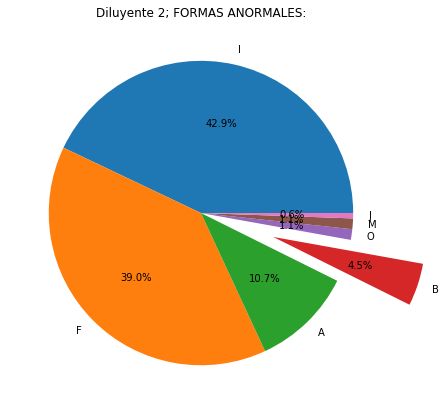

In [34]:
fig, ax = plt.subplots(1, 1)
fig1 = plt.figure(1)
my_explode = [0, 0, 0, 0.5, 0, 0, 0]
ax.pie(values, labels = values.index, explode = my_explode, autopct='%1.1f%%');
plt.title("Diluyente 2; FORMAS ANORMALES:");
fig1.set_size_inches(7, 7)

In [35]:
df_aux = df_DILUYENTE2.groupby(['MOTIVO_DESECHO'])['MOTIVO_DESECHO'].count()
df_aux = pd.DataFrame(df_aux)
df_aux.columns = ['count_MD']
df_aux = df_aux.reset_index()
df_aux

,MOTIVO_DESECHO,count_MD
0,A,19
1,B,8
2,F,69
3,I,76
4,J,1
5,M,2
6,O,2
7,OK,2053


In [36]:
df_aux = df_aux.drop([7], axis=0)
df_aux

,MOTIVO_DESECHO,count_MD
0,A,19
1,B,8
2,F,69
3,I,76
4,J,1
5,M,2
6,O,2


In [37]:
df_aux.to_excel('EYACULADOS-FORMAS_ANORMALES_D2.xlsx')

In [38]:
df_DILUYENTE3 = df[df['TIPO_DILUYENTE'] == 'DILUYENTE_3']

In [39]:
values = df_DILUYENTE3['MOTIVO_DESECHO'].value_counts()
dict(values)
values.pop('OK')

140202

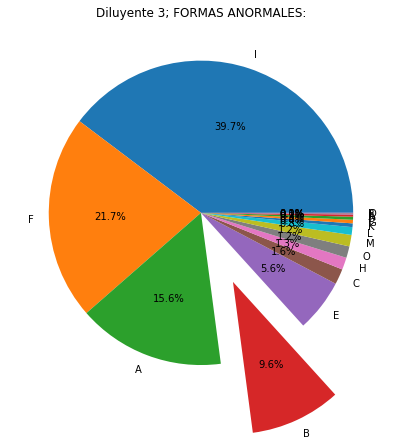

In [40]:
fig, ax = plt.subplots(1, 1)
fig1 = plt.figure(1)
my_explode = [0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(values, labels = values.index, explode = my_explode, autopct='%1.1f%%');
plt.title("Diluyente 3; FORMAS ANORMALES:");
fig1.set_size_inches(7, 7)

In [41]:
df_aux = df_DILUYENTE3.groupby(['MOTIVO_DESECHO'])['MOTIVO_DESECHO'].count()
df_aux = pd.DataFrame(df_aux)
df_aux.columns = ['count_MD']
df_aux = df_aux.reset_index()
df_aux

,MOTIVO_DESECHO,count_MD
0,A,1501
1,B,925
2,C,158
3,D,31
4,E,534
5,F,2086
6,G,36
7,H,124
8,I,3811
9,J,10


In [42]:
df_aux = df_aux.drop([14], axis=0)
df_aux

,MOTIVO_DESECHO,count_MD
0,A,1501
1,B,925
2,C,158
3,D,31
4,E,534
5,F,2086
6,G,36
7,H,124
8,I,3811
9,J,10


In [43]:
df_aux.to_excel('EYACULADOS-FORMAS_ANORMALES_D3.xlsx')

**Al final de cada gráfico de tarta y de barras se adjuna el códifo necesario para crear un fichero .xlsx con el objetivo de ser utilizado por Tableau para la creación del frontend**

# **INFLUENCIA EN TOMAS_CONSERVACION**

**Ahora es el turno del análisis en la base de datos de TOMAS_CONSERVACIÓN, la cual recoge información relativa a las muestras despues de x días de conservación**

In [44]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

conservacion = pd.read_excel('TOMAS_CONSERVACION.xlsx')

In [45]:
conservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS


In [46]:
conservacion.shape

(156578, 13)

**Me creo una columna nueva con los días de reposo junto con el diluyente de cada muestra**

In [47]:
conservacion['TIEMPO_CONSERVACION'] = conservacion['FECHA_ANALISIS'] - conservacion['FECHA_EYACULADO']

In [48]:
conservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO,TIEMPO_CONSERVACION
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS,3 days
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS,3 days
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS,3 days
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS,3 days
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS,3 days


In [49]:
conservacion['TIEMPO_CONSERVACION'].value_counts()

3 days      51115
2 days      43455
0 days      31677
4 days      15437
1 days      10945
5 days       1498
6 days        693
7 days        499
8 days        464
10 days       263
11 days       242
181 days       39
12 days        31
17 days        27
9 days         23
52 days        17
22 days        16
15 days        16
14 days        15
36 days        14
29 days        11
177 days        9
43 days         8
21 days         7
40 days         6
178 days        5
24 days         5
120 days        4
33 days         4
23 days         4
-1 days         3
116 days        3
44 days         3
37 days         3
47 days         3
30 days         3
13 days         2
20 days         2
39 days         1
26 days         1
49 days         1
35 days         1
28 days         1
16 days         1
Name: TIEMPO_CONSERVACION, dtype: int64

**Hasta un máximo de 11 días de conservación se engloban 156288 muestras de 156577, lo que supone un 99% de las muestras de conservación. Analizo lo que ocurre hasta un máximo de 11 días de conservación**

**Lo suyo sería comparar los diferentes diluyentes que hayan tenido el mismo tiempo de conservacion, asi como comparar la evolucion de la motilidad y calidad de movimiento en las diferentes fechas de analisis**

**Las fechas son las mismas y ya están definidas**

In [50]:
conservacion['TIPO_DILUYENTE'] = ''

In [51]:
conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d1_min1) & (conservacion['FECHA_ANALISIS'] <= d1_max1), 'DILUYENTE_1', conservacion['TIPO_DILUYENTE'])
conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d1_min2) & (conservacion['FECHA_ANALISIS'] <= d1_max2), 'DILUYENTE_1', conservacion['TIPO_DILUYENTE'])

conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d2_min1) & (conservacion['FECHA_ANALISIS'] <= d2_max1), 'DILUYENTE_2', conservacion['TIPO_DILUYENTE'])
conservacion['TIPO_DILUYENTE'] = np.where((conservacion['FECHA_ANALISIS']>=d2_min2) & (conservacion['FECHA_ANALISIS'] <= d2_max2), 'DILUYENTE_2', conservacion['TIPO_DILUYENTE'])

conservacion['TIPO_DILUYENTE'] = np.where(conservacion['TIPO_DILUYENTE'] == '', 'DILUYENTE_3',conservacion['TIPO_DILUYENTE'])

In [52]:
conservacion['TIPO_DILUYENTE'].value_counts()

DILUYENTE_3    152714
DILUYENTE_2      2217
DILUYENTE_1      1647
Name: TIPO_DILUYENTE, dtype: int64

**A continuación convierto el tipo TimeDelta en entero**

In [53]:
conservacion['TIEMPO_CONSERVACION'] = pd.to_numeric(conservacion['TIEMPO_CONSERVACION'].dt.days, downcast='integer')

In [54]:
conservacion['TIEMPO_CONSERVACION'][0]

3.0

**Una vez convertido, me quedo solo con las muestras cuyo tiempo de conservación ha sido igual o inferior a 11 dias**

In [55]:
conservacion = conservacion[conservacion['TIEMPO_CONSERVACION'] <= 11]

In [56]:
conservacion['TIEMPO_CONSERVACION'].unique()

array([ 3.,  0.,  2.,  1.,  4.,  8.,  5.,  7.,  6., 10., 11.,  9., -1.])

**Elimino 3 valores que tenian como TIEMPO_CONSERVACION valores de -1**

In [57]:
conservacion = conservacion.drop(conservacion[conservacion['TIEMPO_CONSERVACION'] == -1].index)

In [58]:
conservacion['TIEMPO_CONSERVACION'].unique()

array([ 3.,  0.,  2.,  1.,  4.,  8.,  5.,  7.,  6., 10., 11.,  9.])

In [59]:
conservacion.head()

,NUM_TOMA,NUM_ANALISIS,FECHA_ANALISIS,FECHA_EYACULADO,COD_VERRACO,VERRACO,MOTILIDAD,CALIDAD_MOVIMIENTO,CONTAMINACION,MOTILIDAD4,CALIDAD_MOVIMIENTO4,CONTAMINACION4,CENTRO,TIEMPO_CONSERVACION,TIPO_DILUYENTE
0,185458,150111,2020-06-15,2020-06-12,2571,920ND62,9,7,-1,9,6,-1,PEÑAS,3.0,DILUYENTE_2
1,185459,150112,2020-06-15,2020-06-12,2673,020ND28,9,7,-1,8,7,-1,PEÑAS,3.0,DILUYENTE_2
2,185460,150113,2020-06-15,2020-06-12,2514,920ND21,9,7,-1,7,6,-1,PEÑAS,3.0,DILUYENTE_2
3,185461,150114,2020-06-15,2020-06-12,2506,920ND28,9,7,-1,9,7,-1,PEÑAS,3.0,DILUYENTE_2
4,185462,150115,2020-06-15,2020-06-12,2508,920ND26,9,7,-1,9,7,-1,PEÑAS,3.0,DILUYENTE_2


In [60]:
tablafinal = conservacion.groupby(['TIEMPO_CONSERVACION', 'TIPO_DILUYENTE'])['MOTILIDAD', 'CALIDAD_MOVIMIENTO'].describe()
tablafinal = tablafinal.fillna(0)
tablafinal

MOTILIDAD                                \
                                       count      mean       std  min  25%   
TIEMPO_CONSERVACION TIPO_DILUYENTE                                           
0.0                 DILUYENTE_1        262.0  8.835878  0.643097  0.0  9.0   
                    DILUYENTE_2        422.0  8.905213  0.293268  8.0  9.0   
                    DILUYENTE_3      30993.0  8.366889  0.998823  0.0  8.0   
1.0                 DILUYENTE_1        225.0  8.924444  0.264875  8.0  9.0   
                    DILUYENTE_2        196.0  8.836735  0.627472  3.0  9.0   
                    DILUYENTE_3      10524.0  8.570791  0.800566  0.0  8.0   
2.0                 DILUYENTE_1        693.0  8.730159  0.721811  0.0  9.0   
                    DILUYENTE_2        802.0  8.635910  0.914364  0.0  8.0   
                    DILUYENTE_3      41960.0  8.386416  1.118672  0.0  8.0   
3.0                 DILUYENTE_1        462.0  8.926407  0.340657  4.0  9.0   
                    DILUYENTE_2        796.0  8.790201  0.558484  1.0  9.0   
                    DILUYENTE_3      49857.0  8.377620  0.859557  0.0  8.0   
4.0                 DILUYENTE_1          3.0  8.666667  0.577350  8.0  8.5   
                    DILUYENTE_2          1.0  8.000000  0.000000  8.0  8.0   
                    DILUYENTE_3      15433.0  8.223936  0.757889  0.0  8.0   
5.0                 DILUYENTE_1          2.0  8.000000  0.000000  8.0  8.0   
                    DILUYENTE_3       1496.0  7.944519  1.433100  0.0  8.0   
6.0                 DILUYENTE_3        693.0  8.232323  1.254815  0.0  8.0   
7.0                 DILUYENTE_3        499.0  7.981964  1.204774  0.0  8.0   
8.0                 DILUYENTE_3        464.0  8.278017  0.897724  0.0  8.0   
9.0                 DILUYENTE_3         23.0  8.000000  0.738549  6.0  8.0   
10.0                DILUYENTE_3        263.0  8.296578  0.897126  2.0  8.0   
11.0                DILUYENTE_3        242.0  8.169421  0.849832  1.0  8.0   

                                                  CALIDAD_MOVIMIENTO  \
                                    50%  75%  max              count   
TIEMPO_CONSERVACION TIPO_DILUYENTE                                     
0.0                 DILUYENTE_1     9.0  9.0  9.0              262.0   
                    DILUYENTE_2     9.0  9.0  9.0              422.0   
                    DILUYENTE_3     8.0  9.0  9.0            30993.0   
1.0                 DILUYENTE_1     9.0  9.0  9.0              225.0   
                    DILUYENTE_2     9.0  9.0  9.0              196.0   
                    DILUYENTE_3     9.0  9.0  9.0            10524.0   
2.0                 DILUYENTE_1     9.0  9.0  9.0              693.0   
                    DILUYENTE_2     9.0  9.0  9.0              802.0   
                    DILUYENTE_3     9.0  9.0  9.0            41960.0   
3.0                 DILUYENTE_1     9.0  9.0  9.0              462.0   
                    DILUYENTE_2     9.0  9.0  9.0              796.0   
                    DILUYENTE_3     8.0  9.0  9.0            49857.0   
4.0                 DILUYENTE_1     9.0  9.0  9.0                3.0   
                    DILUYENTE_2     8.0  8.0  8.0                1.0   
                    DILUYENTE_3     8.0  9.0  9.0            15433.0   
5.0                 DILUYENTE_1     8.0  8.0  8.0                2.0   
                    DILUYENTE_3     8.0  9.0  9.0             1496.0   
6.0                 DILUYENTE_3     8.0  9.0  9.0              693.0   
7.0                 DILUYENTE_3     8.0  9.0  9.0              499.0   
8.0                 DILUYENTE_3     8.0  9.0  9.0              464.0   
9.0                 DILUYENTE_3     8.0  8.0  9.0               23.0   
10.0                DILUYENTE_3     8.0  9.0  9.0              263.0   
11.0                DILUYENTE_3     8.0  9.0  9.0              242.0   

                                                                            \
                                        mean       std 

### **ANALISIS MOTILIDAD**

In [61]:
diluyente1, diluyente2, diluyente3 = [], [], []
std_diluyente1, std_diluyente2, std_diluyente3 = [], [], []

for i in range(int(tablafinal.index.levels[0][-1] + 1)):
    if (i < 5):
        diluyente2.append(tablafinal['MOTILIDAD']['mean'][i][1]) 
        diluyente3.append(tablafinal['MOTILIDAD']['mean'][i][2])
        std_diluyente2.append(tablafinal['MOTILIDAD']['std'][i][1])
        std_diluyente3.append(tablafinal['MOTILIDAD']['std'][i][2])
    else:
        diluyente2.append(np.nan)
        std_diluyente2.append(np.nan)

    if (i <= 5):
        diluyente1.append(tablafinal['MOTILIDAD']['mean'][i][0])
        std_diluyente1.append(tablafinal['MOTILIDAD']['std'][i][0])
    else:
        diluyente1.append(np.nan)
        std_diluyente1.append(np.nan)
    
    if (i == 5):
        diluyente3.append(tablafinal['MOTILIDAD']['mean'][i][1])
        std_diluyente3.append(tablafinal['MOTILIDAD']['std'][i][1])
    elif (i > 5):
        diluyente3.append(tablafinal['MOTILIDAD']['mean'][i][0])
        std_diluyente3.append(tablafinal['MOTILIDAD']['std'][i][0])


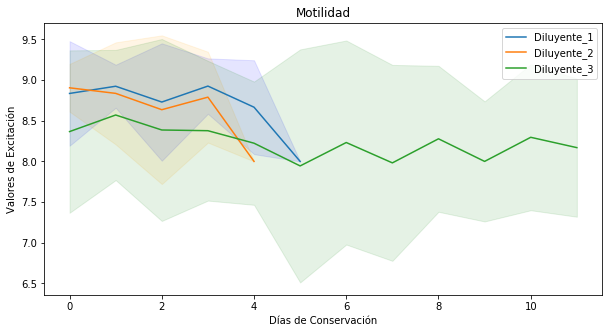

In [62]:
fig1 = plt.figure(i)

plt.plot([i for i in range(len(diluyente1))], diluyente1, label='Diluyente_1')
plt.fill_between([i for i in range(len(diluyente1))], [diluyente1[i] - std_diluyente1[i] for i in range(len(diluyente1))], [diluyente1[i] + std_diluyente1[i] for i in range(len(diluyente1))], alpha=0.1, edgecolor='b', facecolor='b')
plt.plot([i for i in range(len(diluyente2))], diluyente2, label='Diluyente_2')
plt.fill_between([i for i in range(len(diluyente2))], [diluyente2[i] - std_diluyente2[i] for i in range(len(diluyente2))], [diluyente2[i] + std_diluyente2[i] for i in range(len(diluyente2))], alpha=0.1, edgecolor='orange', facecolor='orange')
plt.plot([i for i in range(len(diluyente3))], diluyente3, label='Diluyente_3')
plt.fill_between([i for i in range(len(diluyente3))], [diluyente3[i] - std_diluyente3[i] for i in range(len(diluyente3))], [diluyente3[i] + std_diluyente3[i] for i in range(len(diluyente3))], alpha=0.1, edgecolor='g', facecolor='g')
plt.legend()
plt.title("Motilidad")
plt.xlabel('Días de Conservación')
plt.ylabel('Valores de Excitación')
fig1.set_size_inches(10,5)

In [63]:
len(diluyente3), len(diluyente2), len(diluyente1)

(12, 12, 12)

In [64]:
temp = pd.DataFrame()
temp['DILUYENTE1'] = diluyente1
temp['DILUYENTE2'] = diluyente2
temp['DILUYENTE3'] = diluyente3

temp['MOTILIDAD_BAJA_D1'] = [diluyente1[i] - std_diluyente1[i] for i in range(len(diluyente1))]
temp['MOTILIDAD_BAJA_D2'] = [diluyente2[i] - std_diluyente2[i] for i in range(len(diluyente2))]
temp['MOTILIDAD_BAJA_D3'] = [diluyente3[i] - std_diluyente3[i] for i in range(len(diluyente3))]

temp['MOTILIDAD_ALTA_D1'] = [diluyente1[i] + std_diluyente1[i] for i in range(len(diluyente1))]
temp['MOTILIDAD_ALTA_D2'] = [diluyente2[i] + std_diluyente2[i] for i in range(len(diluyente2))]
temp['MOTILIDAD_ALTA_D3'] = [diluyente3[i] + std_diluyente3[i] for i in range(len(diluyente3))]

temp

,DILUYENTE1,DILUYENTE2,DILUYENTE3,MOTILIDAD_BAJA_D1,MOTILIDAD_BAJA_D2,MOTILIDAD_BAJA_D3,MOTILIDAD_ALTA_D1,MOTILIDAD_ALTA_D2,MOTILIDAD_ALTA_D3
0,8.835878,8.905213,8.366889,8.192781,8.611945,7.368066,9.478975,9.198481,9.365713
1,8.924444,8.836735,8.570791,8.659570,8.209263,7.770224,9.189319,9.464206,9.371357
2,8.730159,8.635910,8.386416,8.008348,7.721546,7.267743,9.451970,9.550275,9.505088
3,8.926407,8.790201,8.377620,8.585750,8.231717,7.518063,9.267064,9.348685,9.237177
4,8.666667,8.000000,8.223936,8.089316,8.000000,7.466047,9.244017,8.000000,8.981825
5,8.000000,NaN,7.944519,8.000000,NaN,6.511419,8.000000,NaN,9.377619
6,NaN,NaN,8.232323,NaN,NaN,6.977508,NaN,NaN,9.487138
7,NaN,NaN,7.981964,NaN,NaN,6.777190,NaN,NaN,9.186738
8,NaN,NaN,8.278017,NaN,NaN,7.380293,NaN,NaN,9.175741
9,NaN,NaN,8.000000,NaN,NaN,7.261451,NaN,NaN,8.738549


In [65]:
temp.to_excel('CONSERVACION-MOTILIDAD.xlsx')

### **ANALISIS CALIDAD MOVIMIENTO**

In [66]:
diluyente1, diluyente2, diluyente3 = [], [], []
std_diluyente1, std_diluyente2, std_diluyente3 = [], [], []

for i in range(int(tablafinal.index.levels[0][-1] + 1)):
    if (i < 5):
        diluyente2.append(tablafinal['CALIDAD_MOVIMIENTO']['mean'][i][1]) 
        diluyente3.append(tablafinal['CALIDAD_MOVIMIENTO']['mean'][i][2])
        std_diluyente2.append(tablafinal['CALIDAD_MOVIMIENTO']['std'][i][1])
        std_diluyente3.append(tablafinal['CALIDAD_MOVIMIENTO']['std'][i][2])
    else:
        diluyente2.append(np.nan)
        std_diluyente2.append(np.nan)

    if (i <= 5):
        diluyente1.append(tablafinal['CALIDAD_MOVIMIENTO']['mean'][i][0])
        std_diluyente1.append(tablafinal['CALIDAD_MOVIMIENTO']['std'][i][0])
    else:
        diluyente1.append(np.nan)
        std_diluyente1.append(np.nan)
    
    if (i == 5):
        diluyente3.append(tablafinal['CALIDAD_MOVIMIENTO']['mean'][i][1])
        std_diluyente3.append(tablafinal['CALIDAD_MOVIMIENTO']['std'][i][1])
    elif (i > 5):
        diluyente3.append(tablafinal['CALIDAD_MOVIMIENTO']['mean'][i][0])
        std_diluyente3.append(tablafinal['CALIDAD_MOVIMIENTO']['std'][i][0])


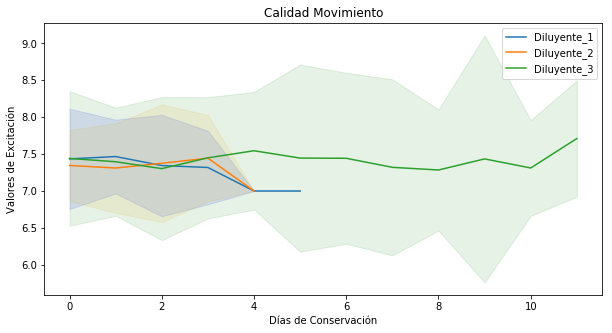

In [67]:
fig1 = plt.figure(i)

plt.plot([i for i in range(len(diluyente1))], diluyente1, label='Diluyente_1')
plt.fill_between([i for i in range(len(diluyente1))], [diluyente1[i] - std_diluyente1[i] for i in range(len(diluyente1))], [diluyente1[i] + std_diluyente1[i] for i in range(len(diluyente1))], alpha=0.1, edgecolor='b', facecolor='b')
plt.plot([i for i in range(len(diluyente2))], diluyente2, label='Diluyente_2')
plt.fill_between([i for i in range(len(diluyente2))], [diluyente2[i] - std_diluyente2[i] for i in range(len(diluyente2))], [diluyente2[i] + std_diluyente2[i] for i in range(len(diluyente2))], alpha=0.1, edgecolor='orange', facecolor='orange')
plt.plot([i for i in range(len(diluyente3))], diluyente3, label='Diluyente_3')
plt.fill_between([i for i in range(len(diluyente3))], [diluyente3[i] - std_diluyente3[i] for i in range(len(diluyente3))], [diluyente3[i] + std_diluyente3[i] for i in range(len(diluyente3))], alpha=0.1, edgecolor='g', facecolor='g')
plt.legend()
plt.title("Calidad Movimiento")
plt.xlabel('Días de Conservación')
plt.ylabel('Valores de Excitación')
fig1.set_size_inches(10,5)

In [68]:
temp = pd.DataFrame()
temp['DILUYENTE1'] = diluyente1
temp['DILUYENTE2'] = diluyente2
temp['DILUYENTE3'] = diluyente3

temp['CM_BAJA_D1'] = [diluyente1[i] - std_diluyente1[i] for i in range(len(diluyente1))]
temp['CM_BAJA_D2'] = [diluyente2[i] - std_diluyente2[i] for i in range(len(diluyente2))]
temp['CM_BAJA_D3'] = [diluyente3[i] - std_diluyente3[i] for i in range(len(diluyente3))]

temp['CM_ALTA_D1'] = [diluyente1[i] + std_diluyente1[i] for i in range(len(diluyente1))]
temp['CM_ALTA_D2'] = [diluyente2[i] + std_diluyente2[i] for i in range(len(diluyente2))]
temp['CM_ALTA_D3'] = [diluyente3[i] + std_diluyente3[i] for i in range(len(diluyente3))]

temp

,DILUYENTE1,DILUYENTE2,DILUYENTE3,CM_BAJA_D1,CM_BAJA_D2,CM_BAJA_D3,CM_ALTA_D1,CM_ALTA_D2,CM_ALTA_D3
0,7.435115,7.345972,7.441132,6.755930,6.864761,6.529106,8.114299,7.827182,8.353157
1,7.466667,7.311224,7.396142,6.966667,6.703516,6.663428,7.966667,7.918933,8.128856
2,7.344877,7.375312,7.303027,6.657907,6.578916,6.333386,8.031848,8.171707,8.272668
3,7.318182,7.444724,7.449325,6.820405,6.859187,6.627431,7.815958,8.030260,8.271219
4,7.000000,7.000000,7.545260,7.000000,7.000000,6.747769,7.000000,7.000000,8.342752
5,7.000000,NaN,7.445856,7.000000,NaN,6.177877,7.000000,NaN,8.713834
6,NaN,NaN,7.443001,NaN,NaN,6.284346,NaN,NaN,8.601657
7,NaN,NaN,7.320641,NaN,NaN,6.127709,NaN,NaN,8.513573
8,NaN,NaN,7.284483,NaN,NaN,6.463000,NaN,NaN,8.105966
9,NaN,NaN,7.434783,NaN,NaN,5.760754,NaN,NaN,9.108811


In [69]:
temp.to_excel('CONSERVACION - CALIDAD_MOVIMIENTO.xlsx')